# 공간분석과 공간통계: 커널분석(kernel analysis)
### 가천대학교 공간정보시스템(14842001) 장요한 (ycanns@gachon.ac.kr)
-------------

#### 1. Initialization

In [1]:
import sys
!{sys.executable} -m pip install geopandas
# ! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import geopandas as gpd
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

import os

#### 2. supply points (전국 시도 중심점 예시)

In [3]:
coordinates = np.array([(37.55724163, 126.9871252), (35.16218448, 129.054632), (35.85547861, 128.5793766), (37.46044164, 126.7004407), (35.1481661, 126.8521798), (36.34082679, 127.3987915), (35.5470358, 129.2569736), (37.45758953, 127.3429823), (37.8087934, 128.2723599), (36.76601606, 127.7690261), (36.54486254, 126.9145592), (35.73520285, 127.1688519), (34.87756336, 126.9620679), (36.16849991, 128.987314), (35.36637585, 128.2590894), (33.38684247, 126.5548156), (36.51783299, 127.2853503)])


#### 3. Data 전처리

In [4]:
# Extract latitude and longitude values
latitudes = coordinates[:, 0]
longitudes = coordinates[:, 1]

#### 4. 커널밀도(kernel density) 분석

In [5]:
# Calculate kernel density estimation
kernel_density = gaussian_kde([latitudes, longitudes])
print(kernel_density)

#### 5. grid point를 생성하여 분석하기

In [6]:
# Generate grid points for evaluation
x_grid, y_grid = np.mgrid[min(latitudes):max(latitudes):100j, min(longitudes):max(longitudes):100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
print(positions)

[[ 33.38684247  33.38684247  33.38684247 ...  37.8087934   37.8087934
   37.8087934 ]
 [126.5548156  126.58211013 126.60940465 ... 129.20238455 129.22967907
  129.2569736 ]]


#### 6. grid point 단위로 커널밀도 평가하기

In [8]:

# Evaluate kernel density at each grid point
density_values = kernel_density(positions)
print(density_values)

[0.02657716 0.02665453 0.02667115 ... 0.00828415 0.00771864 0.0071814 ]


#### 7. 밀도 값을 재정렬하여 grid shape에 매칭

In [9]:

# Reshape density values to match grid shape
density_matrix = np.reshape(density_values, x_grid.shape)
print(density_matrix)

[[0.02657716 0.02665453 0.02667115 ... 0.00151733 0.00149123 0.00146278]
 [0.02699088 0.02708312 0.02711408 ... 0.00178146 0.00175075 0.0017173 ]
 [0.02736689 0.02747584 0.02752313 ... 0.00208412 0.00204811 0.00200892]
 ...
 [0.05633358 0.05834232 0.06031179 ... 0.00904555 0.00845685 0.00789614]
 [0.05437128 0.05629756 0.05818494 ... 0.00865258 0.00807522 0.00752605]
 [0.0523309  0.05417364 0.05597803 ... 0.00828415 0.00771864 0.0071814 ]]


#### 8. 시각화

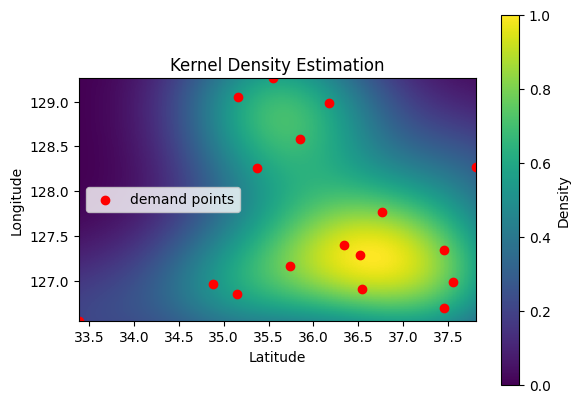

In [10]:
# Plot the kernel density estimation
plt.imshow(density_matrix.T, origin='lower', extent=[min(latitudes), max(latitudes), min(longitudes), max(longitudes)])
plt.scatter(latitudes, longitudes, color='red', label='demand points')
plt.colorbar(label='Density')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

END CODE